# The Data Science Bowl 2018
## Detect cell nuclei

https://datasciencebowl.com/about/

https://www.kaggle.com/c/data-science-bowl-2018

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../')
from pak import utils
from pak.datasets.DSB2018_nuclei import Nuclei
import matplotlib.pyplot as plt

root = '/media/julian/Maxtor/DATA/pak/dsb2018/'

nuclei = Nuclei(root)

Imgs, Masks, ids = nuclei.get_train()
Imgs_test, ids_test = nuclei.get_test()

print("train set:", len(Imgs))
print("test set:", len(Imgs_test))

train set: 670
test set: 65


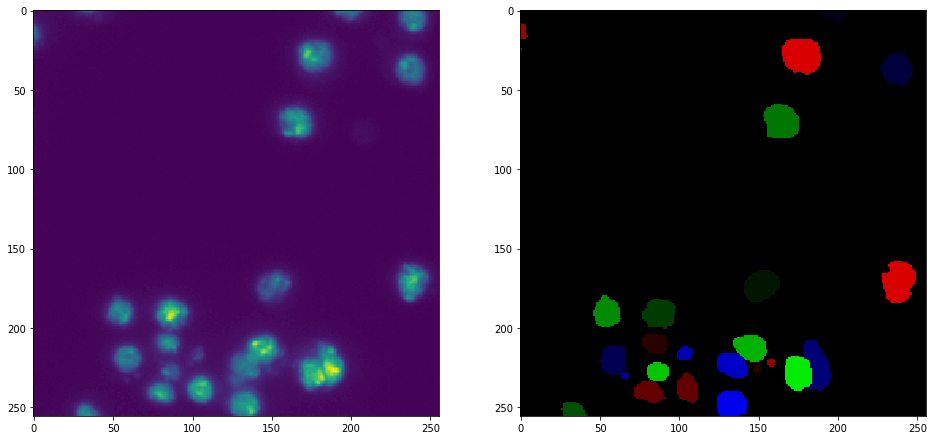

In [2]:
from cselect import color as cs

fig = plt.figure(figsize=(16,8))

I = Imgs[0]
M = Masks[0]

fig.add_subplot(121).imshow(I)

h,w = I.shape
count_cells,h_,w_ = M.shape; assert h_ == h and w_ == w
colors = cs.lincolor(count_cells)


M_img = np.zeros((h,w,3))
for mask,color in zip(M,colors):
    R,G,B = color
    mask = mask / np.max(mask)
    # remove all color from the positions
    inv_mask = (mask == 0).astype('float32')
    M_img[:,:,0] *= inv_mask; M_img[:,:,1] *= inv_mask; M_img[:,:,2] *= inv_mask;
    M_img[:,:,0] += R*mask; M_img[:,:,1] += G*mask; M_img[:,:,2] += B*mask;
    

fig.add_subplot(122).imshow(M_img)

plt.show()